In [2]:
import awkward as ak
import matplotlib.pyplot as plt
import os, sys
import subprocess
import json
import uproot
from coffea.nanoevents import NanoEventsFactory #, ScoutingNanoAODSchema
from coffea.lookup_tools.lookup_base import lookup_base
import numpy as np
from coffea import processor, util
from hist import Hist
import hist
from coffea.analysis_tools import Weights, PackedSelection
from collections import defaultdict
import mplhep
plt.style.use(mplhep.style.CMS)

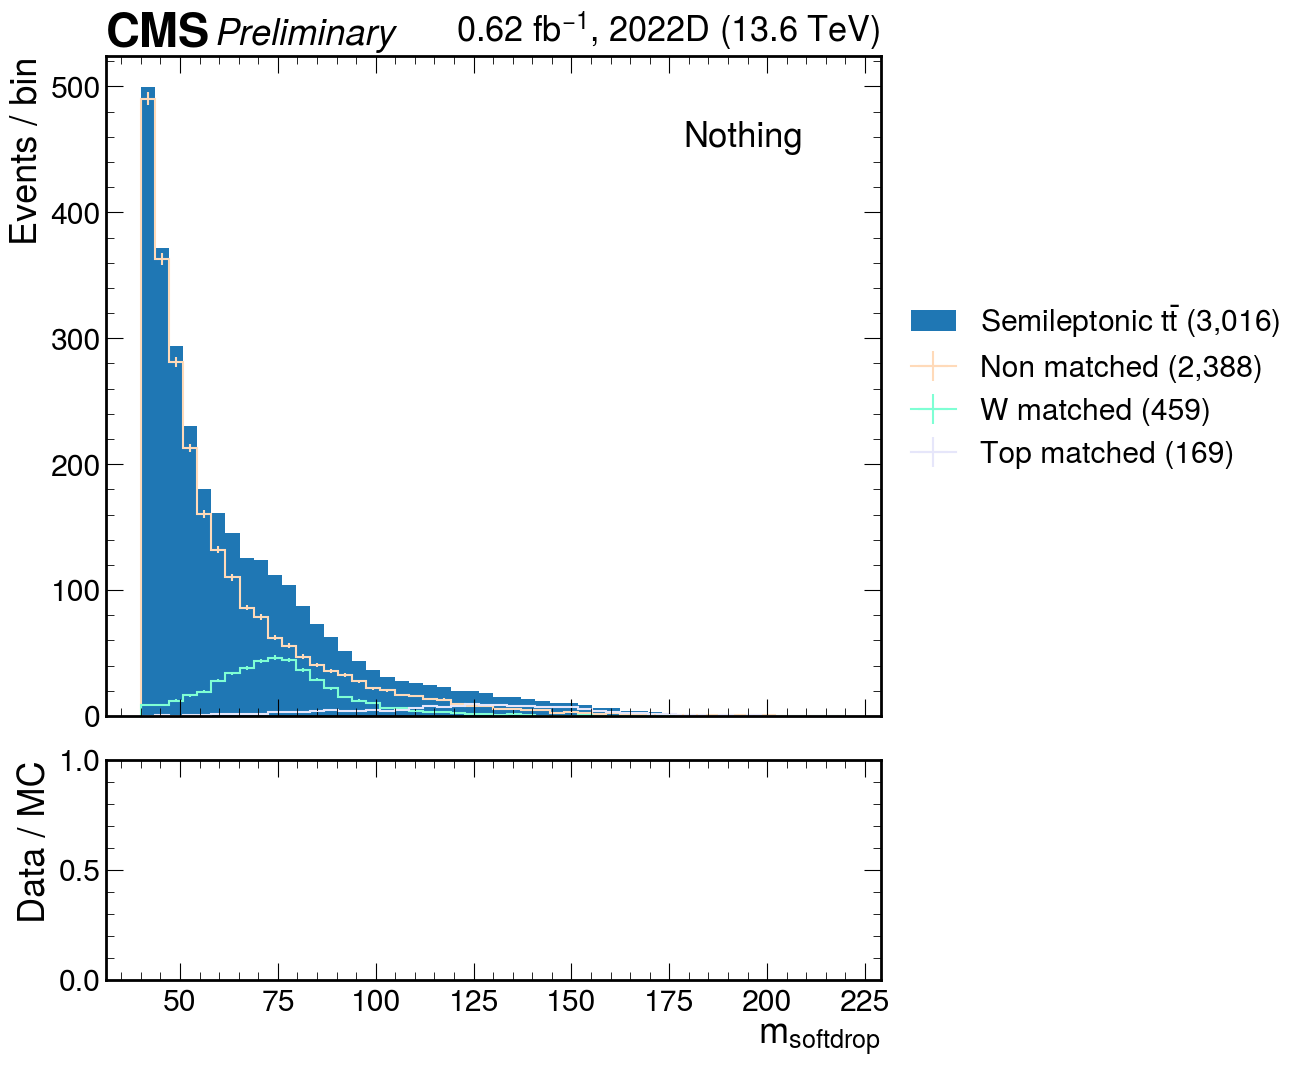

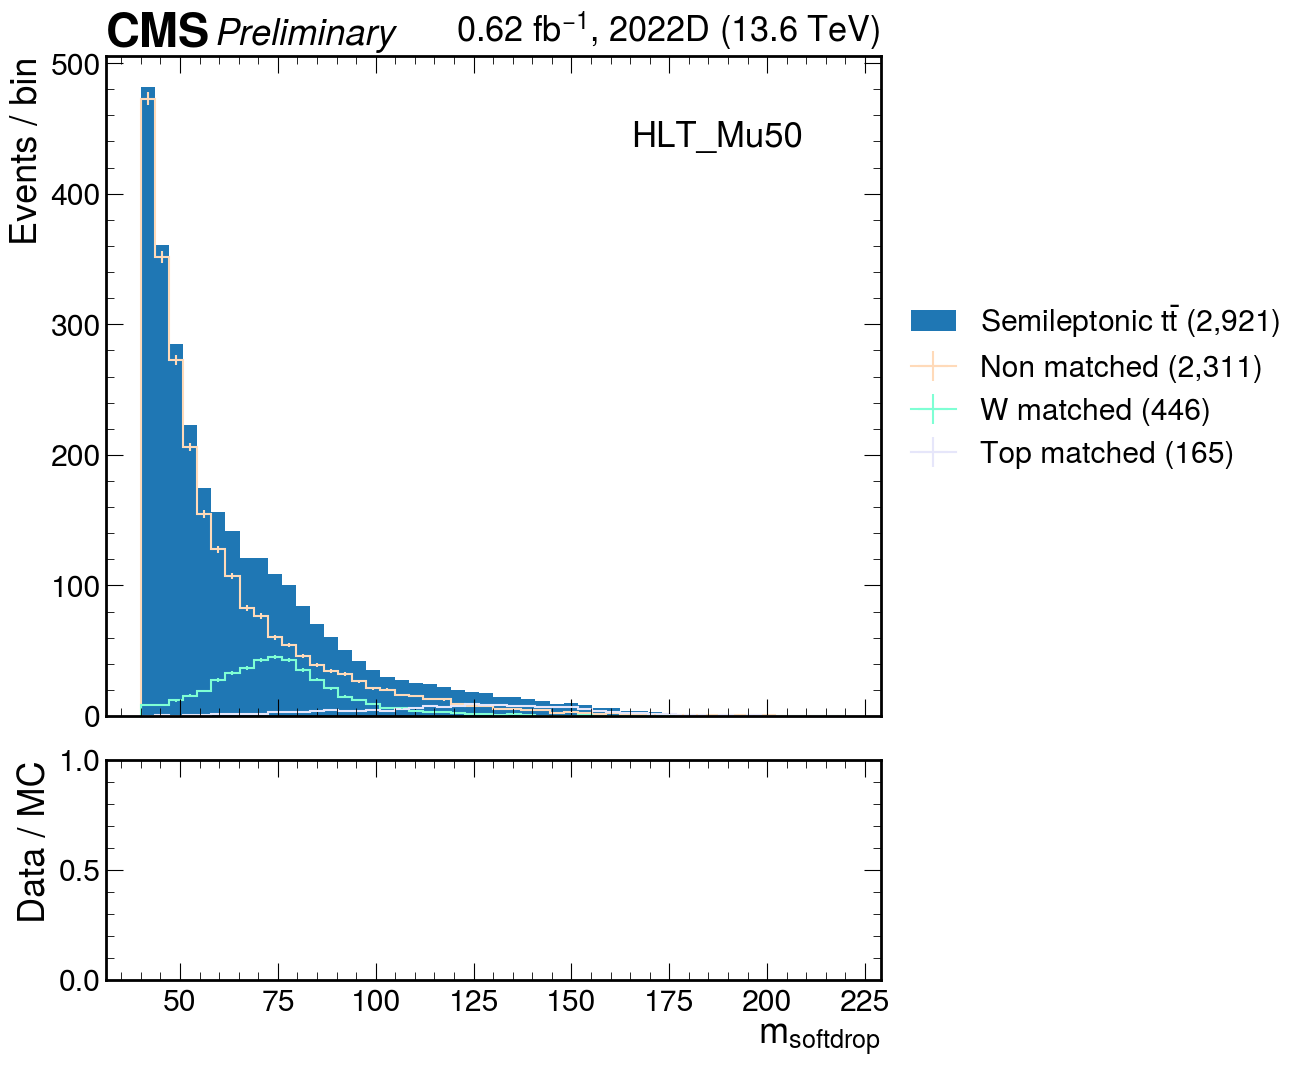

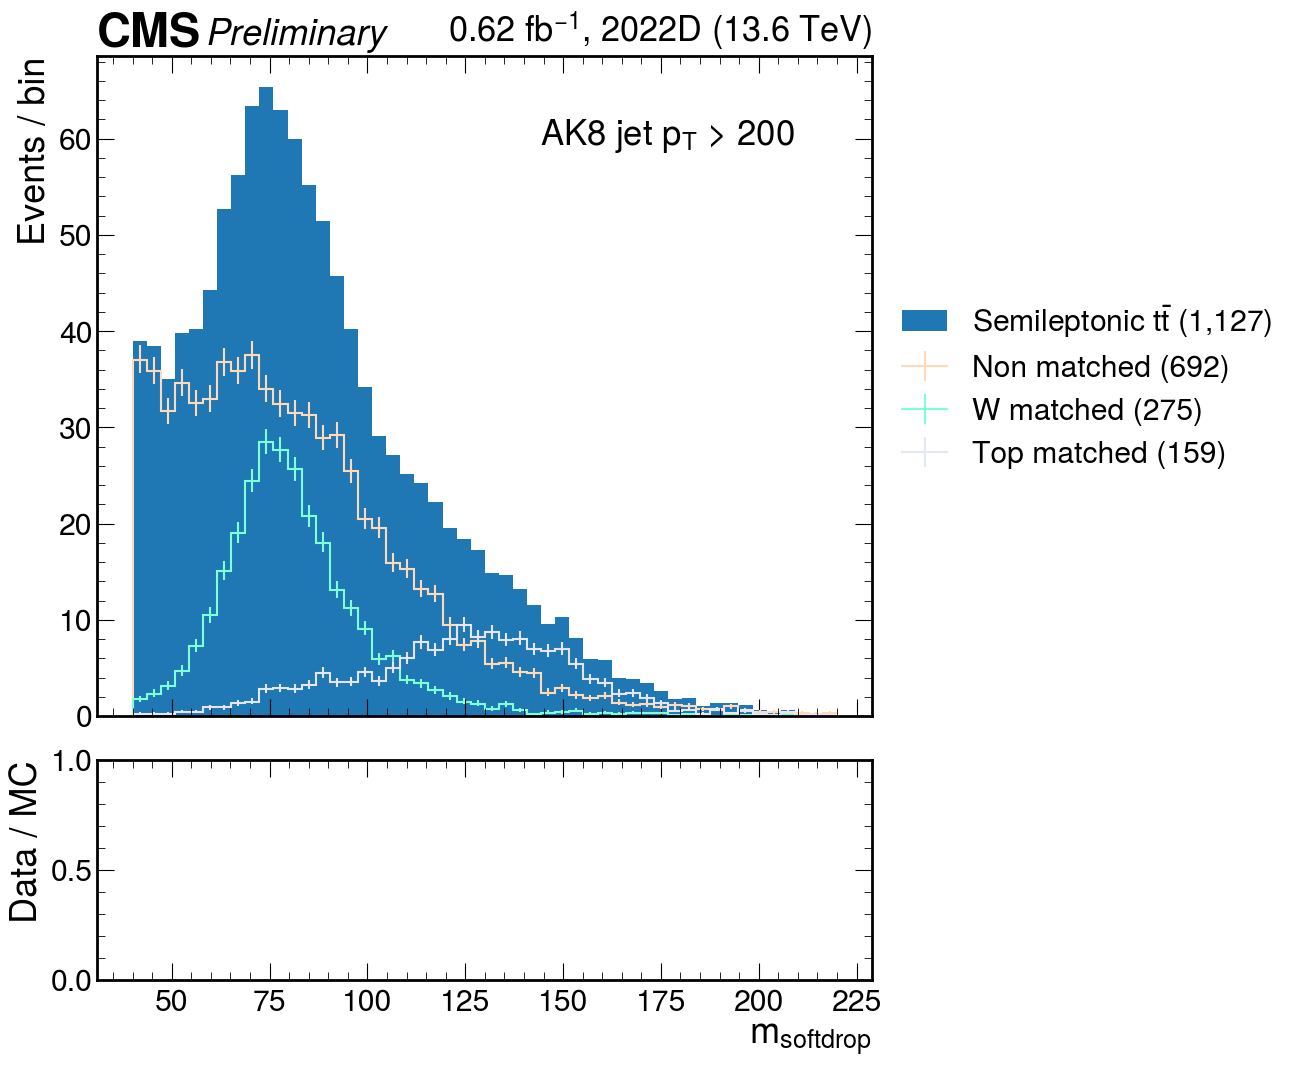

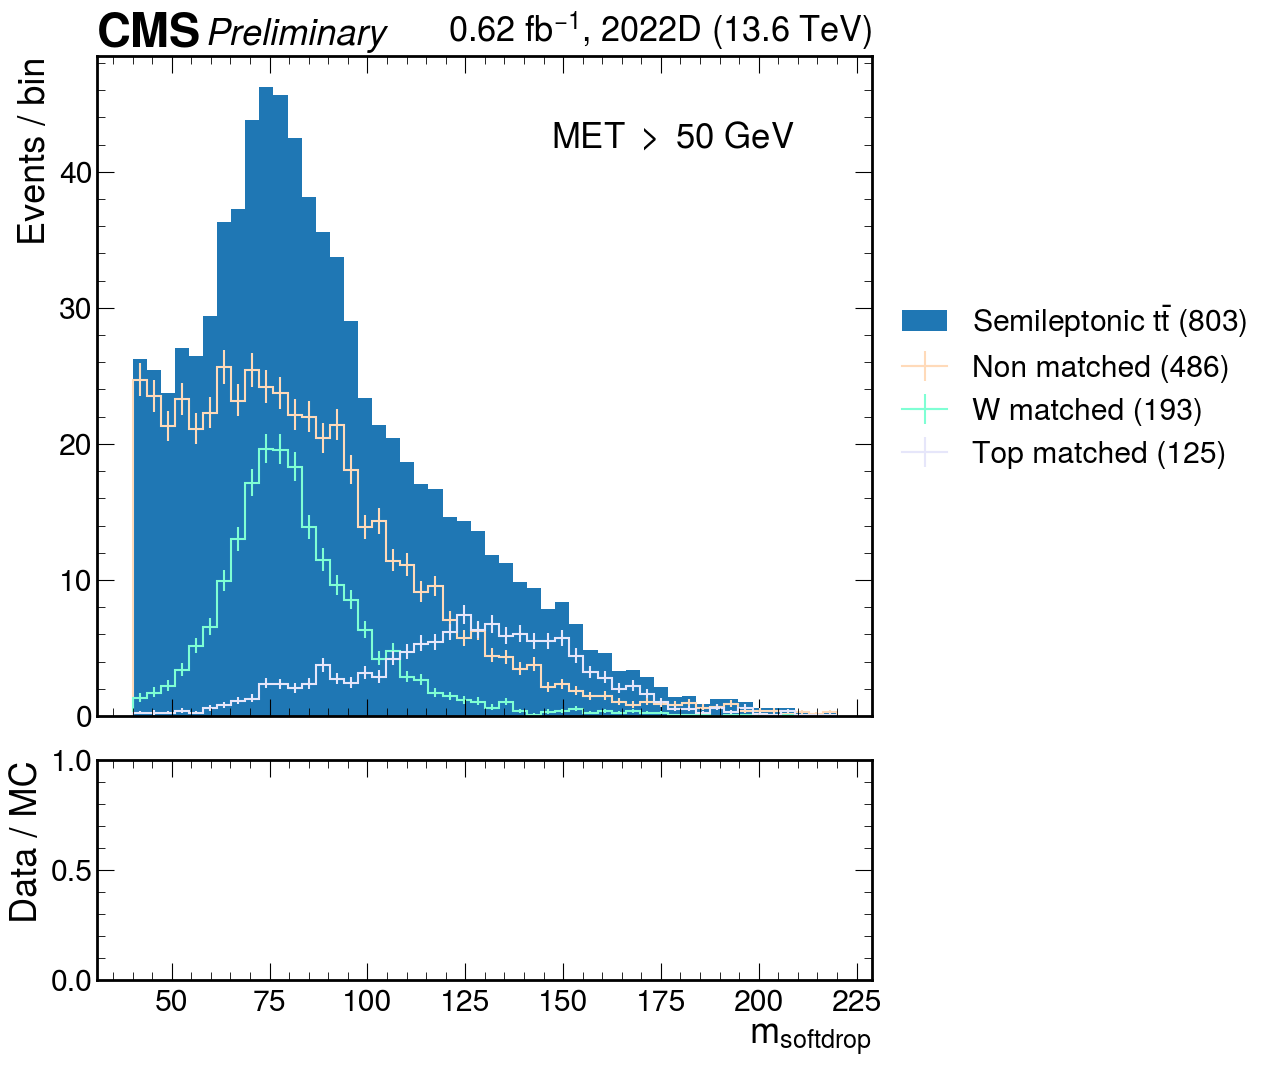

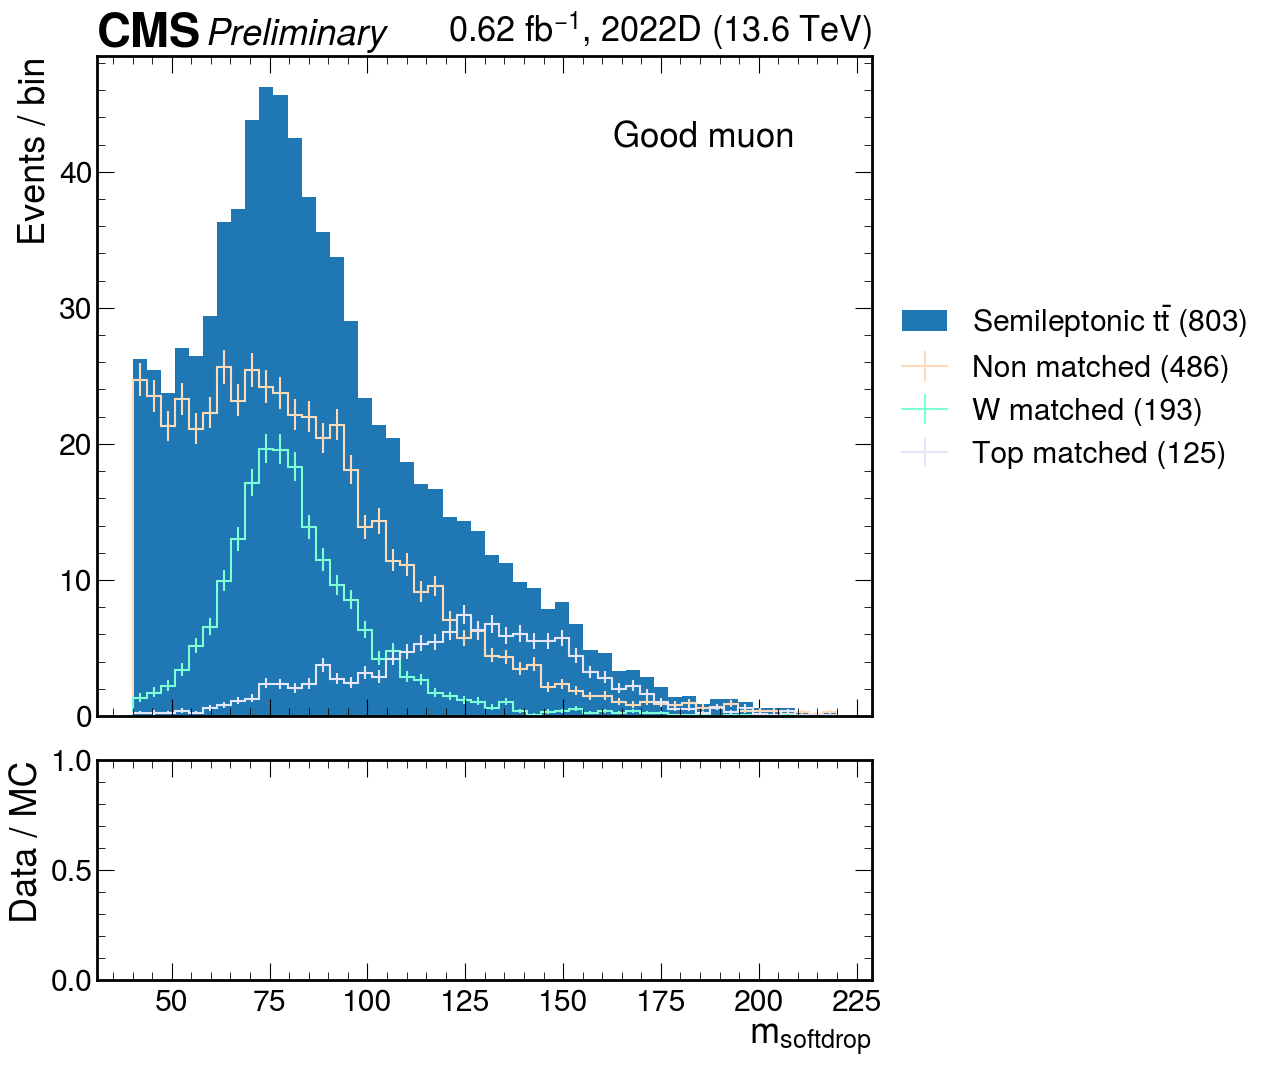

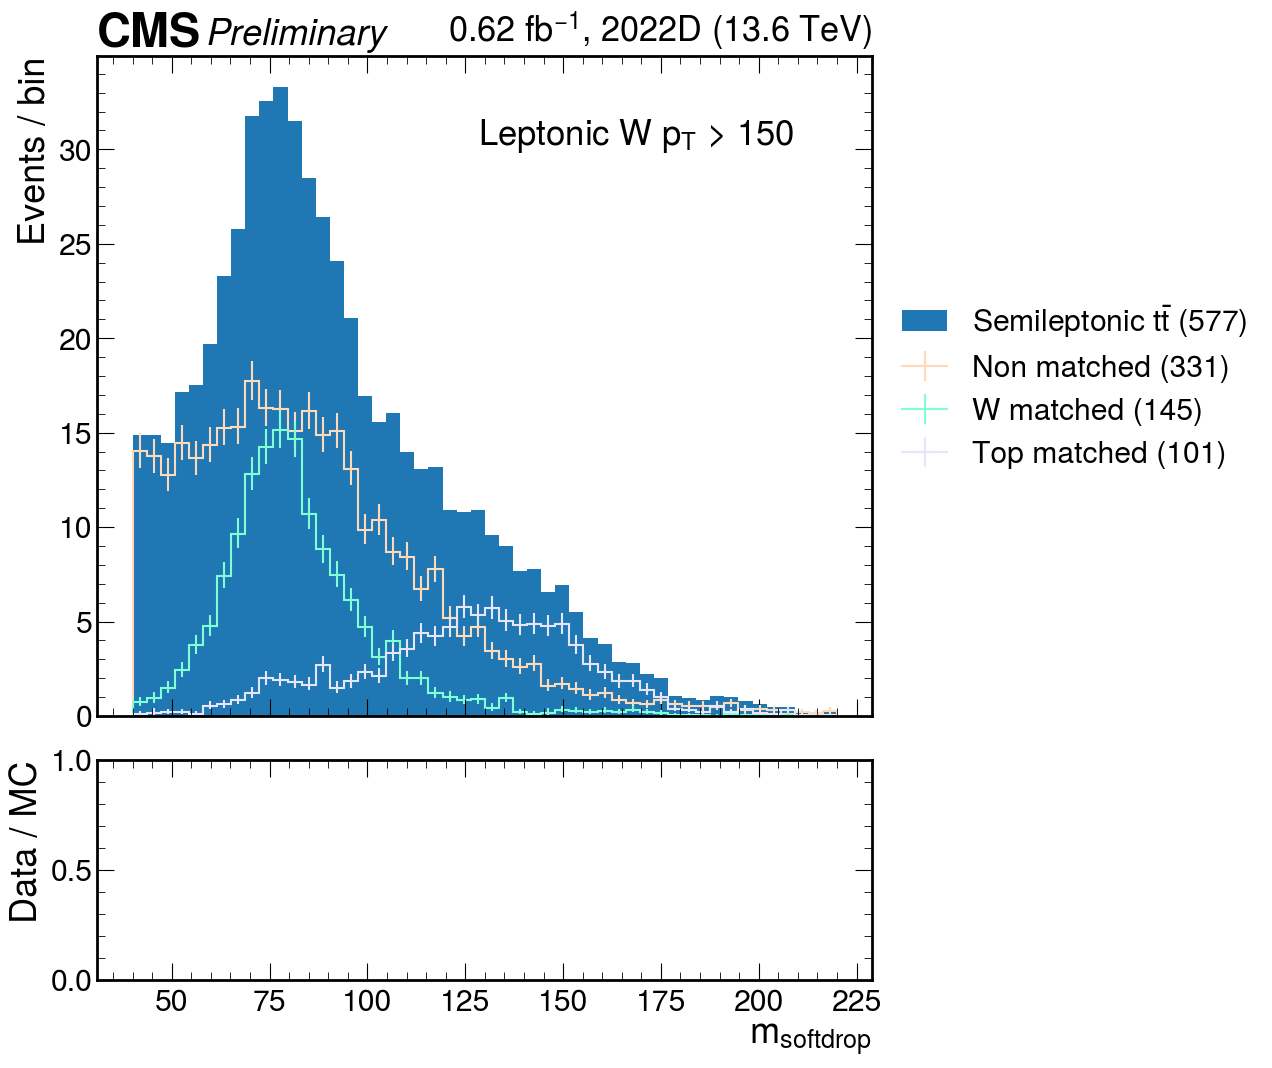

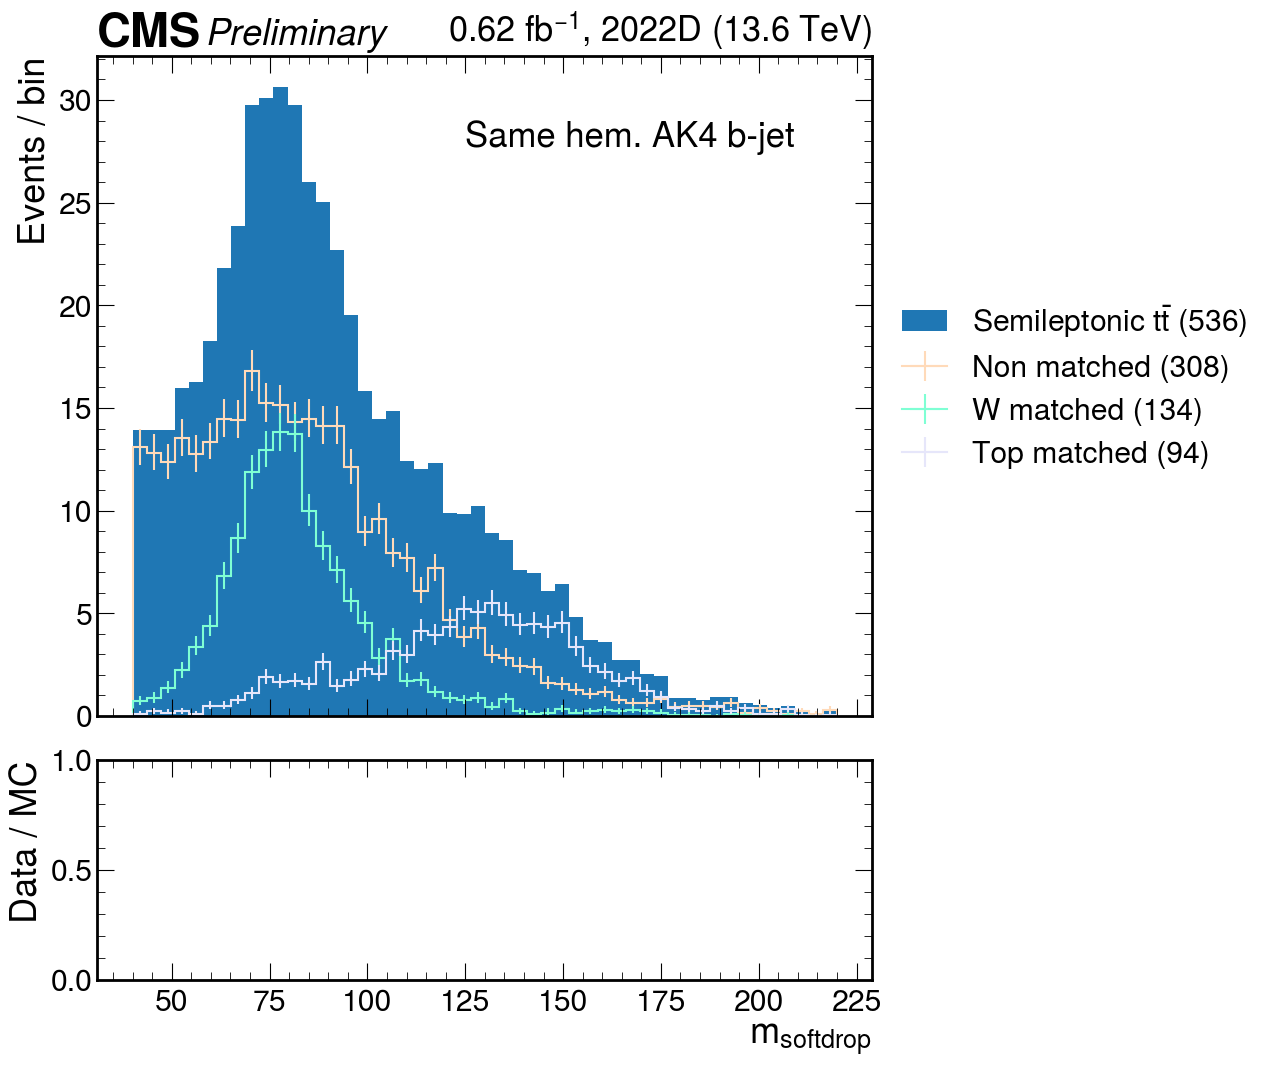

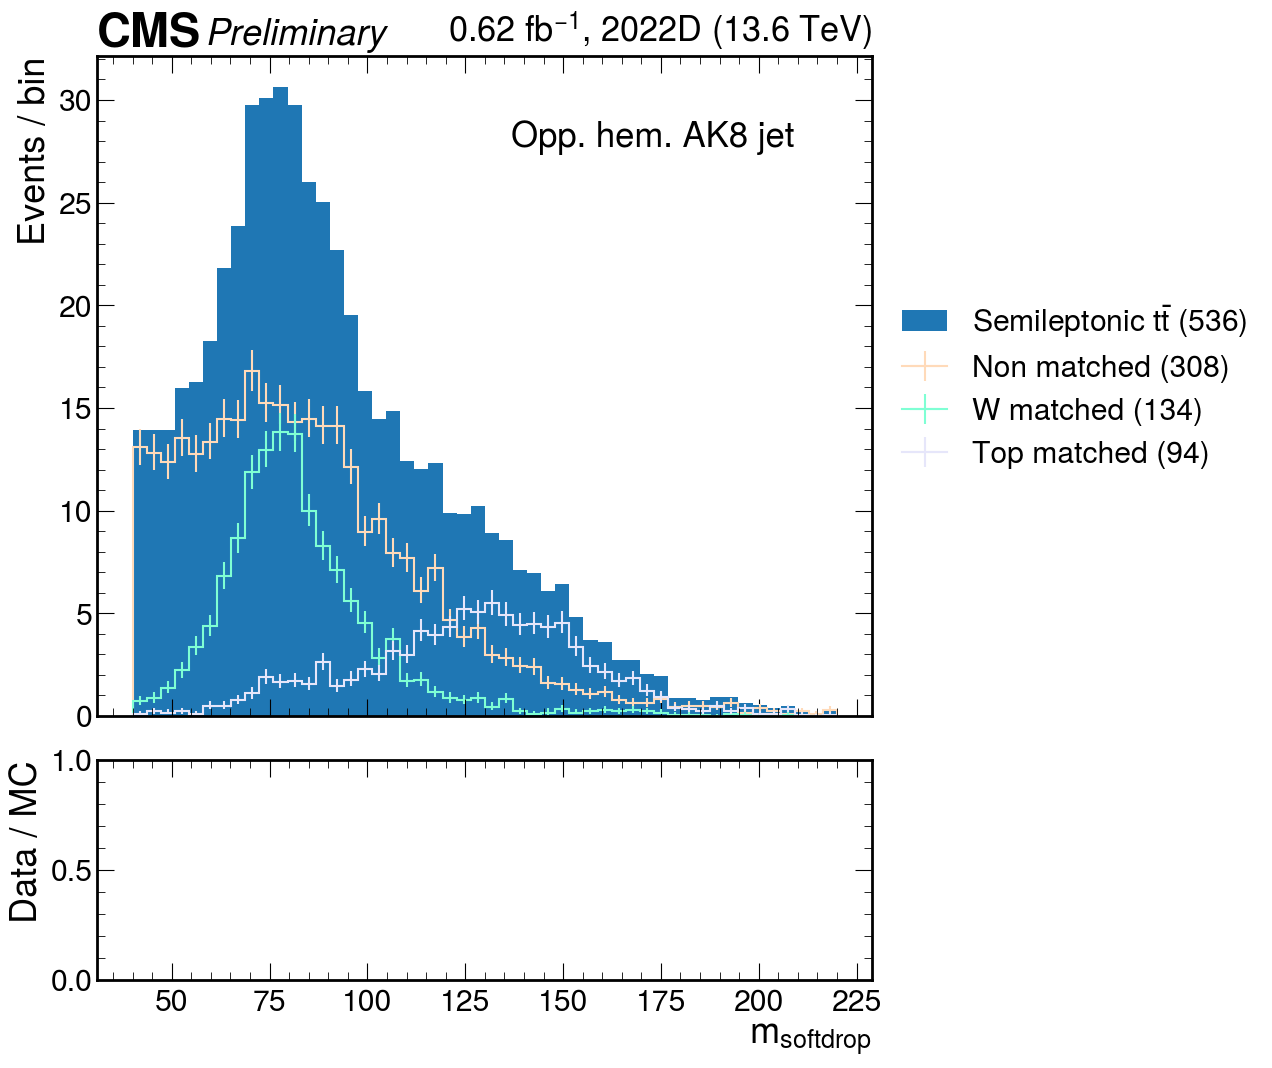

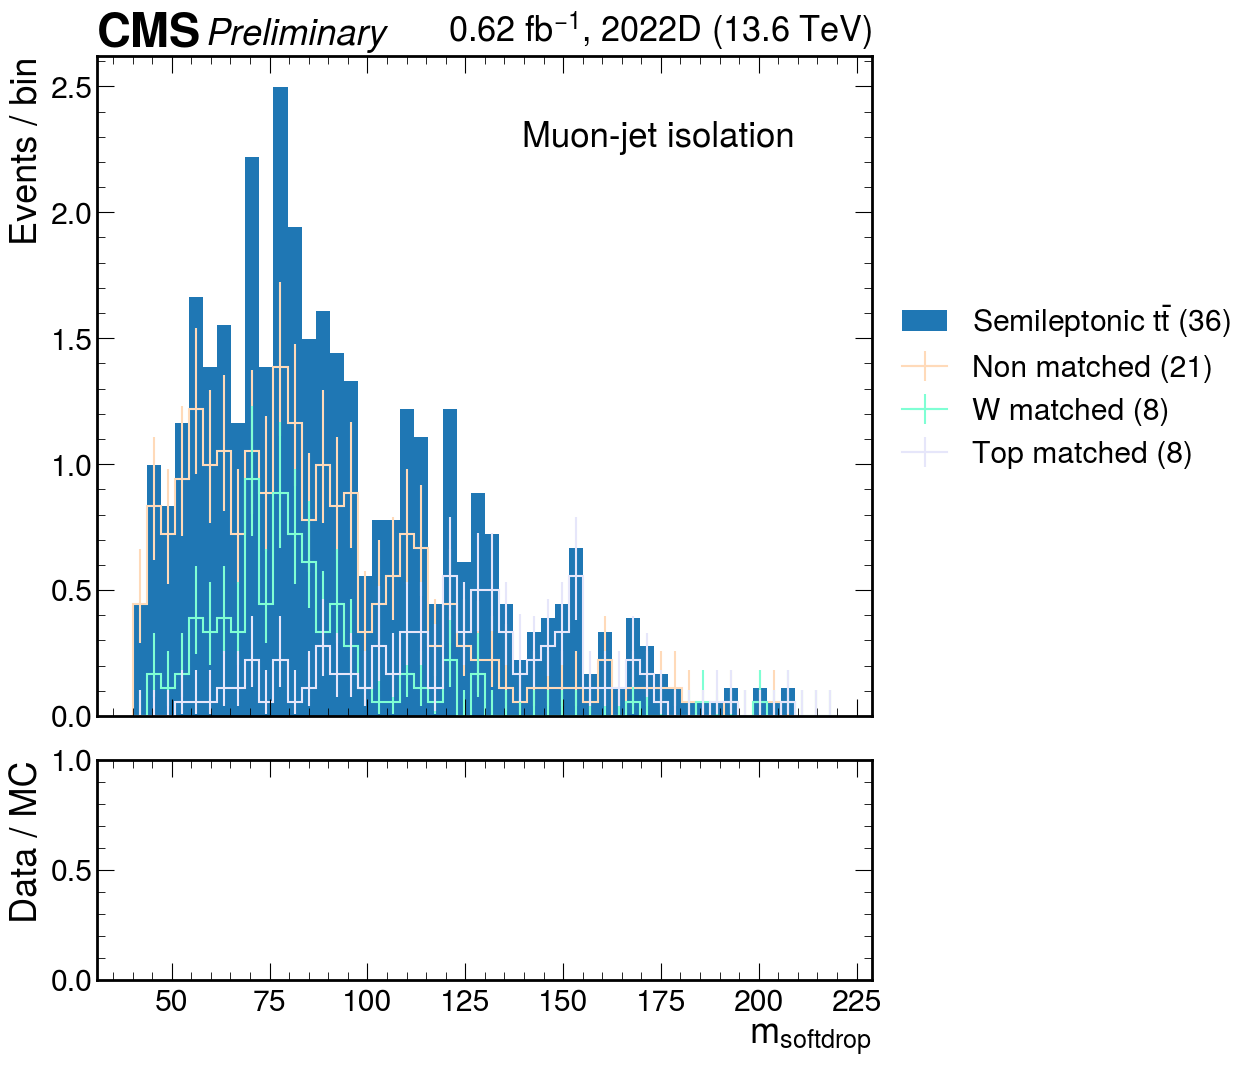

In [134]:
from coffea.hist import clopper_pearson_interval, poisson_interval

#data = util.load("outfiles/Run3Summer22/PV/cutflow_Run2022D.coffea")
mc = util.load("outfiles/Run3Summer22/PV/cutflow_TTtoLNu2Q_short_old.coffea")
#mc = util.load("outfiles/Run3Summer22/PV/cutflow_TTtoLNu2Q_short_old.coffea")
#qcd = util.load("outfiles/Run3Summer22/cutflow_QCD.coffea")[0]

lumis = {
    "2022d" :  624.905199074, #986.530469663
}
xs = {
    "TTtoLNu2Q" : 762.1,
    "QCD" : 222.1,
}
era = "2022d"

cuts = [
    'Nothing',
    'HLT_Mu50',
    'AK8 jet p$_T$ > 200',
    'MET $>$ 50 GeV',
    'Good muon',
    'Leptonic W p$_T$ > 150',
    'Same hem. AK4 b-jet',
    'Opp. hem. AK8 jet',
    'Muon-jet isolation',
]

scale_lumi_mc = {k: xs[k] * lumis[era] / w for k, w in mc['sumw'].items()}

h_mc = mc["cutflow"][{
    "pn_Hbb" : slice(0j, 1j, sum),
    "pt" : slice(hist.underflow, hist.overflow, sum),
}]

for i, name in enumerate(h_mc.axes["dataset"]):
    h_mc.view(flow=True)[i] *= scale_lumi_mc[name]

    
for i in h_mc.axes["cut"]:

    fig, (ax, rax) = plt.subplots(
        2, 1, figsize=(10, 12), gridspec_kw={"height_ratios": (3, 1)}, sharex=True
    )
    fig.subplots_adjust(hspace=0.1)
    ax.set_ylabel("Events / bin")
    rax.set_ylabel("Data / MC")
    rax.set_xlabel(r"m$_{softdrop}$")
    ax.set_xlabel(" ")
    
    hh_mc = h_mc[{"dataset" : sum, "cut" : hist.loc(i)}]
    
    mplhep.histplot(
        [
            hh_mc[{"cat" : sum}],
        ],
        ax=ax, 
        histtype="fill",
        label=[
            r"Semileptonic $t\bar{t}$" + f" ({hh_mc.sum().value:,.0f})",
        ],
        stack=True,
        sort="y_r",
    )
    
    mplhep.histplot(
        [
            hh_mc[{"cat" : hist.loc(3)}],
            hh_mc[{"cat" : hist.loc(2)}],
            hh_mc[{"cat" : hist.loc(1)}],
        ],
        ax=ax,
        label=[
            "Non matched ({0:,.0f})".format(hh_mc[{"cat" : hist.loc(3)}].sum().value),
            "W matched ({0:,.0f})".format(hh_mc[{"cat" : hist.loc(2)}].sum().value),
            "Top matched ({0:,.0f})".format(hh_mc[{"cat" : hist.loc(1)}].sum().value),
        ],
        color=["peachpuff","aquamarine","lavender"]
    )
    
    rax.axhline(1, color='gray',ls='--')
    
    plt.text(0.9, 0.85, f"{cuts[i]}",
                fontsize=25,
                horizontalalignment='right',
                verticalalignment='bottom',
                transform=ax.transAxes
               )

    mplhep.cms.label(
            ax=ax, 
            data=True, 
            label="Preliminary",
            year="2022D",
            lumi=f"{lumis[era]/1000:.2f}",
            com=13.6,
        )
    
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

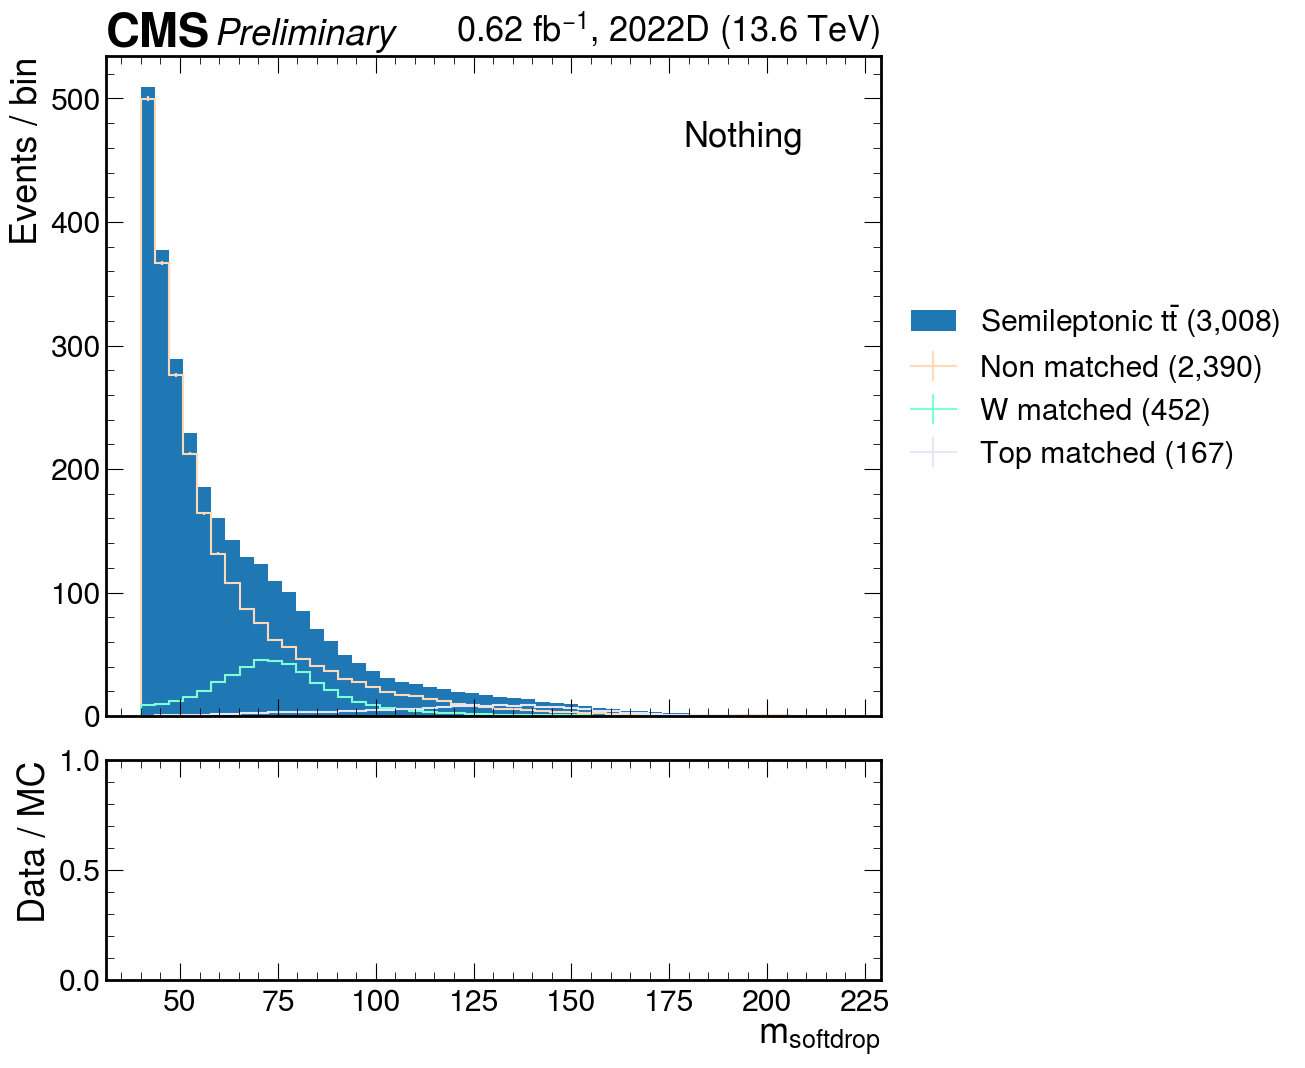

In [95]:
from coffea.hist import clopper_pearson_interval, poisson_interval

mc = util.load("outfiles/Run3Summer22/old/cutflow_TTtoLNu2Q.coffea")

lumis = {
    "2022d" :  624.905199074, #986.530469663
}
xs = {
    "TTtoLNu2Q" : 762.1,
    "QCD" : 222.1,
}
era = "2022d"

cuts = [
    'Nothing',
    'HLT_Mu50',
    'AK8 jet p$_T$ > 200',
    'MET $>$ 50 GeV',
    'Good muon',
    'Leptonic W p$_T$ > 150',
    'Same hem. AK4 b-jet',
    'Opp. hem. AK8 jet',
]

scale_lumi_mc = {k: xs[k] * lumis[era] / w for k, w in mc['sumw'].items()}

h_mc = mc["cutflow"][{
    "pn_Hbb" : slice(0j, 1j, sum),
    "pt" : slice(hist.underflow, hist.overflow, sum),
}]


for i, name in enumerate(h_mc.axes["dataset"]):
    h_mc.view(flow=True)[i] *= scale_lumi_mc[name]

for i in [0]: #h_mc.axes["cut"]:

    fig, (ax, rax) = plt.subplots(
        2, 1, figsize=(10, 12), gridspec_kw={"height_ratios": (3, 1)}, sharex=True
    )
    fig.subplots_adjust(hspace=0.1)
    ax.set_ylabel("Events / bin")
    rax.set_ylabel("Data / MC")
    rax.set_xlabel(r"m$_{softdrop}$")
    ax.set_xlabel(" ")
    
    hh_mc = h_mc[{"dataset" : sum, "cut" : hist.loc(i)}]
    
    mplhep.histplot(
        [
            hh_mc[{"cat" : sum}],
        ],
        ax=ax, 
        histtype="fill",
        label=[
            r"Semileptonic $t\bar{t}$" + f" ({hh_mc.sum().value:,.0f})",
        ],
        stack=True,
        sort="y_r",
    )
    
    mplhep.histplot(
        [
            hh_mc[{"cat" : hist.loc("non_matched")}],
            hh_mc[{"cat" : hist.loc("w_matched")}],
            hh_mc[{"cat" : hist.loc("top_matched")}],
        ],
        ax=ax,
        label=[
            "Non matched ({0:,.0f})".format(hh_mc[{"cat" : hist.loc("non_matched")}].sum().value),
            "W matched ({0:,.0f})".format(hh_mc[{"cat" : hist.loc("w_matched")}].sum().value),
            "Top matched ({0:,.0f})".format(hh_mc[{"cat" : hist.loc("top_matched")}].sum().value),
        ],
        color=["peachpuff","aquamarine","lavender"]
    )
    
    rax.axhline(1, color='gray',ls='--')
    
    plt.text(0.9, 0.85, f"{cuts[i]}",
                fontsize=25,
                horizontalalignment='right',
                verticalalignment='bottom',
                transform=ax.transAxes
               )

    mplhep.cms.label(
            ax=ax, 
            data=True, 
            label="Preliminary",
            year="2022D",
            lumi=f"{lumis[era]/1000:.2f}",
            com=13.6,
        )
    
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
from coffea.hist import clopper_pearson_interval, poisson_interval

data = util.load("outfiles/Run3Summer22/PV/cutflow_Run2022D.coffea")
mc = util.load("outfiles/Run3Summer22/PV/cutflow_TTtoLNu2Q.coffea")
#qcd = util.load("outfiles/Run3Summer22/cutflow_QCD.coffea")[0]

lumis = {
    "2022d" : 986.530469663, #624.905199074,
}
xs = {
    "TTtoLNu2Q" : 762.1,
    "QCD" : 222.1,
}
era = "2022d"

cuts = [
    'Nothing',
    'HLT_Mu50',
    'AK8 jet p$_T$ > 200',
    'MET $>$ 50 GeV',
    'Good muon',
    'Leptonic W p$_T$ > 150',
    'Same hem. AK4 b-jet',
    'Opp. hem. AK8 jet',
    'Muon-jet isolation',
]

scale_lumi_mc = {k: xs[k] * lumis[era] / w for k, w in mc['sumw'].items()}
#scale_lumi_qcd = {k: xs[k] * lumis[era] / w for k, w in qcd['sumw'].items()}

h_data =  data["cutflow"][{
    "cat" : slice(hist.underflow, hist.overflow, sum),
    "dataset" : slice(hist.underflow, hist.overflow, sum),
    "pn_Hbb" : slice(0j, 1j, sum),
    "ecalIso" : slice(hist.underflow, hist.overflow, sum),
    "hcalIso" : slice(hist.underflow, hist.overflow, sum),
}]
h_mc = mc["cutflow"][{
    "pn_Hbb" : slice(0j, 1j, sum),
    "ecalIso" : slice(hist.underflow, hist.overflow, sum),
    "hcalIso" : slice(hist.underflow, hist.overflow, sum),
}]
# h_qcd = qcd["cutflow"][{
#     "pn_Hbb" : slice(hist.underflow+1, hist.overflow-1, sum), 
#     "pt" : slice(hist.underflow, hist.overflow, sum),
# }]

for i, name in enumerate(h_mc.axes["dataset"]):
    h_mc.view(flow=True)[i] *= scale_lumi_mc[name]
    
# for i, name in enumerate(h_qcd.axes["dataset"]):
#     h_qcd.view(flow=True)[i] *= scale_lumi_qcd[name]
    
for i in h_data.axes["cut"]:

    fig, (ax, rax) = plt.subplots(
        2, 1, figsize=(10, 12), gridspec_kw={"height_ratios": (3, 1)}, sharex=True
    )
    fig.subplots_adjust(hspace=0.1)
    ax.set_ylabel("Events / bin")
    rax.set_ylabel("Data / MC")
    rax.set_xlabel(r"m$_{softdrop}$")
    ax.set_xlabel(" ")
    #ax.set_yscale("log")
    
    hh_mc = h_mc[{"dataset" : sum, "cut" : hist.loc(i)}]
#     hh_qcd = h_qcd[{"dataset" : sum, "cut" : hist.loc(i), "cat" : sum}]
    
    mplhep.histplot(
        [
            hh_mc[{"cat" : sum}],
#             hh_qcd,
        ],
        ax=ax, 
        histtype="fill",
        label=[
            r"Semileptonic $t\bar{t}$" + f" ({hh_mc.sum().value:,.0f})",
#             "QCD ({0:,.0f})".format(hh_qcd.sum().value),
        ],
        stack=True,
        sort="y_r",
#         color=[
#             "#1874CD", 
#              "#00BFFF"
#         ]
    )
    
    mplhep.histplot(
        [
            hh_mc[{"cat" : hist.loc(3)}],
            hh_mc[{"cat" : hist.loc(2)}],
            hh_mc[{"cat" : hist.loc(1)}],
        ],
        ax=ax,
        label=[
            "Non matched ({0:,.0f})".format(hh_mc[{"cat" : hist.loc(3)}].sum().value),
            "W matched ({0:,.0f})".format(hh_mc[{"cat" : hist.loc(2)}].sum().value),
            "Top matched ({0:,.0f})".format(hh_mc[{"cat" : hist.loc(1)}].sum().value),
        ],
        color=["peachpuff","aquamarine","lavender"]
    )

    hh_data = h_data[{"cut" : hist.loc(i)}]
    
    mplhep.histplot(
        hh_data, 
        ax=ax, 
        histtype="errorbar",
        xerr=True,
        c="black",
        label=f"Data ({hh_data.sum().value:,.0f})"
    )
    
    centers = hh_data.axes[0].centers
    sumw_num, sumw2_num = hh_data.values(), hh_data.variances()
    sumw_denom, sumw2_denom = hh_mc[{"cat" : sum}].values(), hh_mc[{"cat" : sum}].variances()
    
    rsumw = sumw_num / np.maximum(1, sumw_denom)
    rsumw_unc = poisson_interval(
        rsumw,
        sumw2_num / sumw_denom**2
    )
    
    data_err_opts = {
        'linestyle': 'none',
        'marker': '.',
        'markersize': 10.,
        'color': 'k',
        'elinewidth': 1,
    }
    
    #ax.set_ylim([0,90])
    
    rax.errorbar(
        centers,
        rsumw,
        xerr=centers[1]-centers[0],
        yerr=rsumw_unc,
        **data_err_opts,
    )
    
    rax.axhline(1, color='gray',ls='--')
    
    plt.text(0.9, 0.85, f"{cuts[i]}",
                fontsize=25,
                horizontalalignment='right',
                verticalalignment='bottom',
                transform=ax.transAxes
               )

    mplhep.cms.label(
            ax=ax, 
            data=True, 
            label="Preliminary",
            year="2022D",
            lumi=f"{lumis[era]/1000:.2f}",
            com=13.6,
        )
    
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

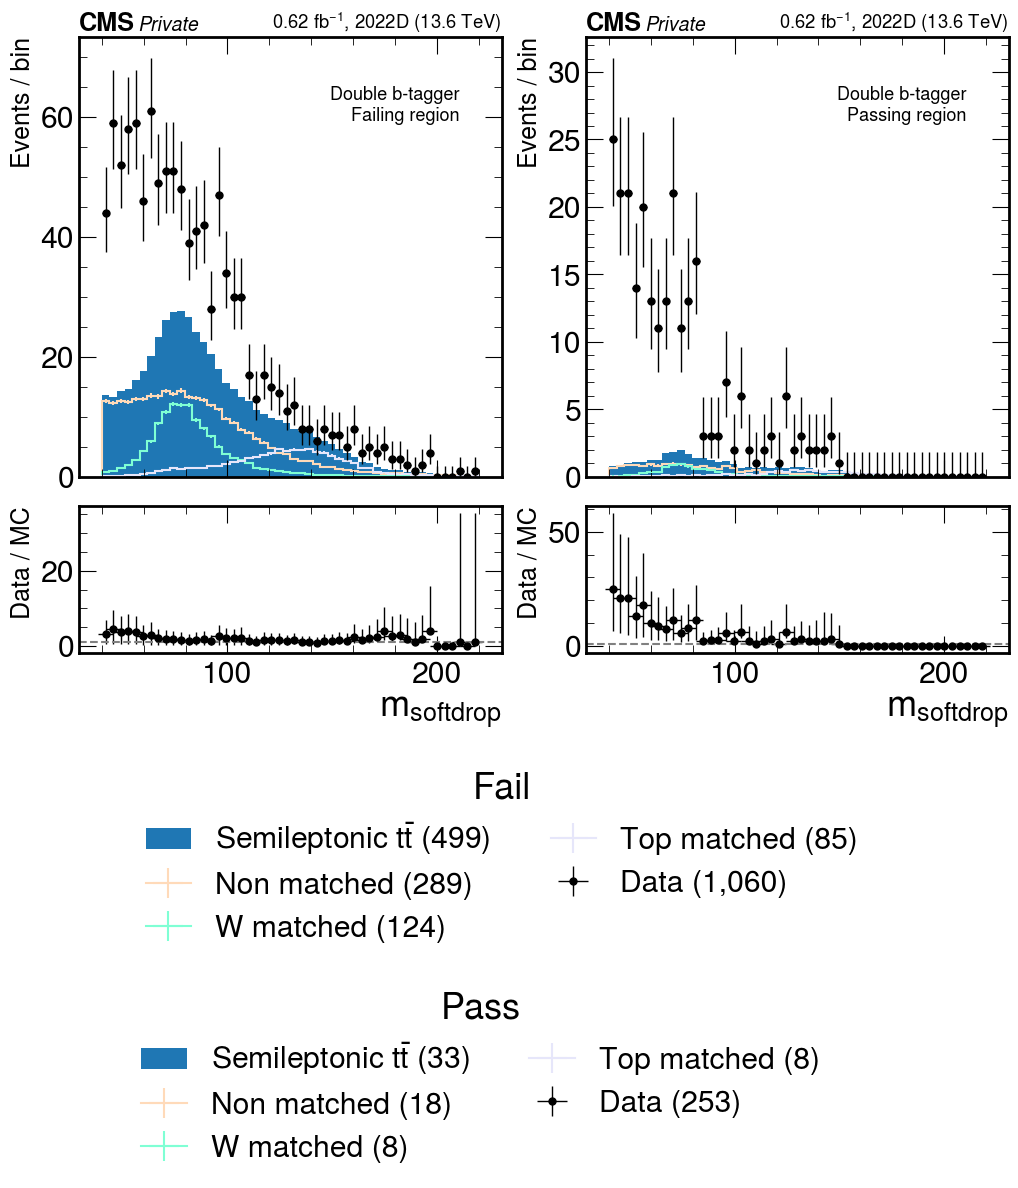

In [36]:
from coffea.hist import clopper_pearson_interval, poisson_interval

data = util.load("outfiles/Run3Summer22/old/cutflow_Run2022D.coffea")[0]
mc = util.load("outfiles/Run3Summer22/old/cutflow_TTtoLNu2Q.coffea")

lumis = {
    "2022d" : 624.905199074,
}
xs = {
    "TTtoLNu2Q" : 762.1,
}
era = "2022d"

cuts = [
    'Nothing',
    'HLT_Mu50',
    'AK8 jet p$_T$ > 200',
    'MET $>$ 50 GeV',
    'Good muon',
    'Leptonic W p$_T$ > 150',
    'Same hem. AK4 b-jet',
    'Opp. hem. AK8 jet',
]

region = {
    0 : "Failing region",
    1 : "Passing region",
}

hist_data = {}
hist_mc = {}

scale_lumi = {k: xs[k] * lumis[era] / w for k, w in mc['sumw'].items()}
    
h_data =  data["cutflow"][{
    "cat" : slice(hist.underflow, hist.overflow, sum),
    "dataset" : slice(hist.underflow, hist.overflow, sum),
    "pt" : slice(hist.underflow, hist.overflow, sum),
}]
h_mc = mc["cutflow"][{
    "pt" : slice(hist.underflow, hist.overflow, sum),
}]

for i, name in enumerate(h_mc.axes["dataset"]):
    h_mc.view(flow=True)[i] *= scale_lumi[name]
    
for i in [7]: #h_mc.axes["cut"]:

    fig, (ax, rax) = plt.subplots(
        2, 2, figsize=(12, 8), gridspec_kw={"height_ratios": (3, 1)}, sharex=True
    )
    
    for j, r in enumerate(["fail", "pass"]):
    
        fig.subplots_adjust(hspace=0.1)
        ax[j].set_ylabel("Events / bin" if j == 0 else " ")
        rax[j].set_ylabel("Data / MC" if j == 0 else " ")
        rax[j].set_xlabel(r"m$_{softdrop}$")
        ax[j].set_xlabel(" ")

        sli = slice(hist.underflow, 0.4j, sum) if j == 0 else slice(0.4j, hist.overflow, sum)
        hh_mc = h_mc[{"dataset" : sum, "cut" : hist.loc(i), "pn_Hbb" : sli}]
        hist_mc[r] = hh_mc

        mplhep.histplot(
            hh_mc[{"cat" : sum}],
            ax=ax[j], 
            histtype="fill",
            label=r"Semileptonic $t\bar{t}$" + f" ({hh_mc.sum().value:,.0f})"
        )

        mplhep.histplot(
            [
                hh_mc[{"cat" : hist.loc("non_matched")}],
                hh_mc[{"cat" : hist.loc("w_matched")}],
                hh_mc[{"cat" : hist.loc("top_matched")}],
            ],
            ax=ax[j],
            label=[
                "Non matched ({0:,.0f})".format(hh_mc[{"cat" : hist.loc("non_matched")}].sum().value),
                "W matched ({0:,.0f})".format(hh_mc[{"cat" : hist.loc("w_matched")}].sum().value),
                "Top matched ({0:,.0f})".format(hh_mc[{"cat" : hist.loc("top_matched")}].sum().value),
            ],
            color=["peachpuff","aquamarine","lavender"]
        )

        hh_data = h_data[{"cut" : hist.loc(i), "pn_Hbb" : sli}]
        hist_data[r] = hh_data

        mplhep.histplot(
            hh_data, 
            ax=ax[j], 
            histtype="errorbar",
            xerr=True,
            c="black",
            label=f"Data ({hh_data.sum().value:,.0f})"
        )

        centers = hh_data.axes[0].centers
        sumw_num, sumw2_num = hh_data.values(), hh_data.variances()
        sumw_denom, sumw2_denom = hh_mc[{"cat" : sum}].values(), hh_mc[{"cat" : sum}].variances()

        rsumw = sumw_num / np.maximum(1, sumw_denom)
        rsumw_unc = poisson_interval(
            rsumw,
            sumw2_num / sumw_denom**2
        )

        data_err_opts = {
            'linestyle': 'none',
            'marker': '.',
            'markersize': 10.,
            'color': 'k',
            'elinewidth': 1,
        }

        rax[j].errorbar(
            centers,
            rsumw,
            xerr=centers[1]-centers[0],
            yerr=rsumw_unc,
            **data_err_opts,
        )

        rax[j].axhline(1, color='gray',ls='--')

        plt.text(0.9, 0.8, f"Double b-tagger\n{region[j]}", #"\n{cuts[i]}",
                    fontsize=13,
                    horizontalalignment='right',
                    verticalalignment='bottom',
                    transform=ax[j].transAxes
                   )

        mplhep.cms.label(
            ax=ax[j], 
            data=True, 
            label="Private",
            year="2022D",
            lumi=f"{lumis[era]/1000:.2f}",
            com=13.6,
            fontsize=14,
        )
        
        ax[j].set_ylabel("Events / bin", fontsize=18)
        rax[j].set_ylabel("Data / MC", fontsize=18)

    ax[0].legend(loc='upper center', title="Fail", bbox_to_anchor=(1, -0.6), ncol=2)
    ax[1].legend(loc='upper center', title="Pass", bbox_to_anchor=(-0.25, -1.1), ncol=2)

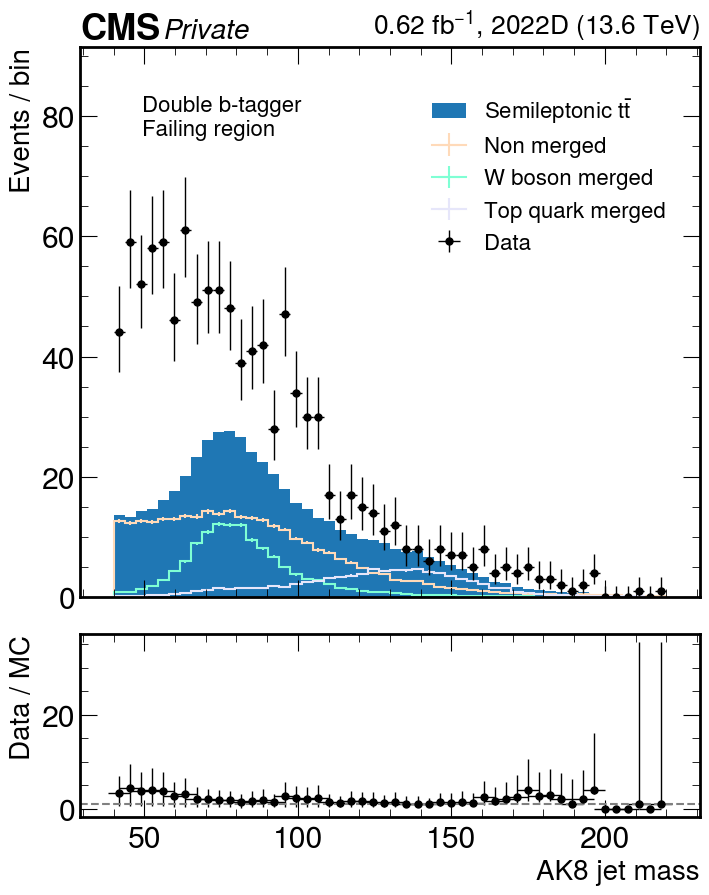

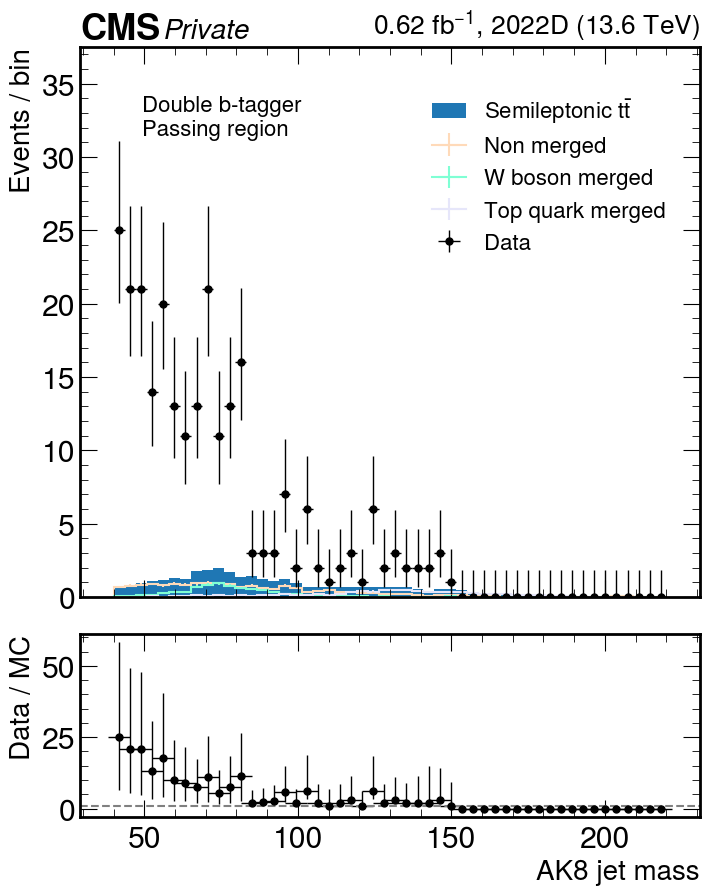

In [88]:
from coffea.hist import clopper_pearson_interval, poisson_interval

data = util.load("outfiles/Run3Summer22/old/cutflow_Run2022D.coffea")[0]
mc = util.load("outfiles/Run3Summer22/old/cutflow_TTtoLNu2Q.coffea")

lumis = {
    "2022d" : 624.905199074,
}
xs = {
    "TTtoLNu2Q" : 762.1,
}
era = "2022d"

cuts = [
    'Nothing',
    'HLT_Mu50',
    'AK8 jet p$_T$ > 200',
    'MET $>$ 50 GeV',
    'Good muon',
    'Leptonic W p$_T$ > 150',
    'Same hem. AK4 b-jet',
    'Opp. hem. AK8 jet',
]

region = {
    0 : "Failing region",
    1 : "Passing region",
}

hist_data = {}
hist_mc = {}

scale_lumi = {k: xs[k] * lumis[era] / w for k, w in mc['sumw'].items()}
    
h_data =  data["cutflow"][{
    "cat" : slice(hist.underflow, hist.overflow, sum),
    "dataset" : slice(hist.underflow, hist.overflow, sum),
    "pt" : slice(hist.underflow, hist.overflow, sum),
}]
h_mc = mc["cutflow"][{
    "pt" : slice(hist.underflow, hist.overflow, sum),
}]

for i, name in enumerate(h_mc.axes["dataset"]):
    h_mc.view(flow=True)[i] *= scale_lumi[name]
    
for i in [7]:
    
    for j, r in enumerate(["fail", "pass"]):
        
        fig, (ax, rax) = plt.subplots(
            2, 1, figsize=(8, 10), gridspec_kw={"height_ratios": (3, 1)}, sharex=True
        )
        fig.subplots_adjust(hspace=0.1)

        sli = slice(hist.underflow, 0.4j, sum) if j == 0 else slice(0.4j, hist.overflow, sum)
        hh_mc = h_mc[{"dataset" : sum, "cut" : hist.loc(i), "pn_Hbb" : sli}]
        hist_mc[r] = hh_mc

        mplhep.histplot(
            hh_mc[{"cat" : sum}],
            ax=ax, 
            histtype="fill",
            label=r"Semileptonic $t\bar{t}$",
        )

        mplhep.histplot(
            [
                hh_mc[{"cat" : hist.loc("non_matched")}],
                hh_mc[{"cat" : hist.loc("w_matched")}],
                hh_mc[{"cat" : hist.loc("top_matched")}],
            ],
            ax=ax,
            label=[
                "Non merged",
                "W boson merged",
                "Top quark merged",
            ],
            color=["peachpuff","aquamarine","lavender"]
        )

        hh_data = h_data[{"cut" : hist.loc(i), "pn_Hbb" : sli}]
        hist_data[r] = hh_data

        mplhep.histplot(
            hh_data, 
            ax=ax, 
            histtype="errorbar",
            xerr=True,
            c="black",
            label=f"Data"
        )

        centers = hh_data.axes[0].centers
        sumw_num, sumw2_num = hh_data.values(), hh_data.variances()
        sumw_denom, sumw2_denom = hh_mc[{"cat" : sum}].values(), hh_mc[{"cat" : sum}].variances()

        rsumw = sumw_num / np.maximum(1, sumw_denom)
        rsumw_unc = poisson_interval(
            rsumw,
            sumw2_num / sumw_denom**2
        )

        data_err_opts = {
            'linestyle': 'none',
            'marker': '.',
            'markersize': 10.,
            'color': 'k',
            'elinewidth': 1,
        }
        
        ax.set_ylim([0, max(hh_data.values()) * 1.5])

        rax.errorbar(
            centers,
            rsumw,
            xerr=centers[1]-centers[0],
            yerr=rsumw_unc,
            **data_err_opts,
        )

        rax.axhline(1, color='gray',ls='--')

        plt.text(0.1, 0.83, f"Double b-tagger\n{region[j]}", #"\n{cuts[i]}",
                    fontsize=16,
                    horizontalalignment='left',
                    verticalalignment='bottom',
                    transform=ax.transAxes
                   )

        mplhep.cms.label(
            ax=ax, 
            data=True, 
            label="Private",
            year="2022D",
            lumi=f"{lumis[era]/1000:.2f}",
            com=13.6,
            fontsize=20,
        )
        
        ax.set_ylabel("Events / bin", fontsize=20)
        rax.set_ylabel("Data / MC", fontsize=20)
        rax.set_xlabel(r"AK8 jet mass", fontsize=20)
        ax.set_xlabel(" ")
        
        ax.legend(loc='best', fontsize=16, bbox_to_anchor=(0.98, 0.95))

In [15]:
import uproot

with uproot.recreate("outfiles/histograms.root") as fout:
    for region in ["fail", "pass"]:
        fout[f"data_obs_{region}_nominal"] = hist_data[region]

        for matched in ["non_matched", "w_matched", "top_matched"]:
            fout[f"{matched.split('_')[0]}_{region}_nominal"] = hist_mc[region][{"cat" : hist.loc(matched)}]

In [17]:
with uproot.open("outfiles/histograms.root") as fin:
    for key, value in fin.items():
        print(key)

data_obs_fail_nominal;1
non_fail_nominal;1
w_fail_nominal;1
top_fail_nominal;1
data_obs_pass_nominal;1
non_pass_nominal;1
w_pass_nominal;1
top_pass_nominal;1


In [71]:
import os, sys
import subprocess
import json
import uproot3
import awkward as ak
import numpy as np
from coffea import processor, util
import pickle


campaign = "Run3Summer22"
indir = f"outfiles/{campaign}"
infiles = ["outfiles/Run3Summer22/cutflow_QCD.coffea", "outfiles/Run3Summer22/cutflow_TTtoLNu2Q.coffea"]
#subprocess.getoutput(f"ls {indir}/cutflow_*.coffea --ignore {indir}/cutflow_Run2022D.coffea").split()
outsum = processor.dict_accumulator()

# Check if pickle exists, remove it if it does
picklename = f"outfiles/{campaign}/templates.pkl"
if os.path.isfile(picklename):
    os.remove(picklename)

for filename in infiles:

    print("Loading "+filename)

    if os.path.isfile(filename):
        out = util.load(filename)

        if type(out) == tuple:
                out = out[0]
                
        process = out["cutflow"].axes["dataset"][0]
        
        outsum[process] = out['cutflow']
        #outsum['sumw'] = out['sumw']

        del out

Loading outfiles/Run3Summer22/cutflow_QCD.coffea
Loading outfiles/Run3Summer22/cutflow_TTtoLNu2Q.coffea


In [66]:
qcd = util.load("outfiles/Run3Summer22/cutflow_QCD.coffea")

In [88]:
ttbar = util.load("outfiles/Run3Summer22/cutflow_TTtoLNu2Q.coffea")

In [91]:
ttbar["cutflow"] + ttbar["cutflow"]

Hist(
  StrCategory(['TTtoLNu2Q'], growth=True, name='dataset', label='Dataset'),
  StrCategory(['nan', 'non_matched', 'w_matched', 'top_matched'], growth=True, name='cat', label='Category'),
  Regular(50, 40, 220, name='msoftdrop'),
  Regular(50, 150, 700, name='pt', label='$p_T$'),
  Regular(50, 0, 1, name='pn_Hbb', label='H(bb) vs QCD score'),
  IntCategory([0, 1, 2, 3, 4, 5, 6, 7], growth=True, name='cut', label='Cut Idx'),
  storage=Weight()) # Sum: WeightedSum(value=6.02243e+08, variance=2.07613e+11) (WeightedSum(value=4.51744e+10, variance=1.53638e+13) with flow)

In [92]:
ttbar["cutflow"]

Hist(
  StrCategory(['TTtoLNu2Q'], growth=True, name='dataset', label='Dataset'),
  StrCategory(['nan', 'non_matched', 'w_matched', 'top_matched'], growth=True, name='cat', label='Category'),
  Regular(50, 40, 220, name='msoftdrop'),
  Regular(50, 150, 700, name='pt', label='$p_T$'),
  Regular(50, 0, 1, name='pn_Hbb', label='H(bb) vs QCD score'),
  IntCategory([0, 1, 2, 3, 4, 5, 6, 7], growth=True, name='cut', label='Cut Idx'),
  storage=Weight()) # Sum: WeightedSum(value=3.01121e+08, variance=1.03807e+11) (WeightedSum(value=2.25872e+10, variance=7.68188e+12) with flow)

In [ ]:
scale_lumi = {k: xs[k] * 1000 * lumis[year] / w for k, w in outsum['sumw'].items()} 

outsum['templates'].scale(scale_lumi, 'dataset')

print(outsum['templates'].identifiers('dataset'))

templates = outsum['templates'].group('dataset', hist.Cat('process', 'Process'), pmap)

del outsum

outfile = open(picklename, 'wb')
pickle.dump(template